## Sub-Assignment 1

In [48]:
import matplotlib.pyplot as plt

In [49]:
import pandas as pd
url = 'https://github.com/xscientisttech/detaset/raw/main/india-state-wise-data-analysis.csv'
df = pd.read_csv("detaset-main/india-state-wise-data-analysis.csv")
# Dataset is now stored in a Pandas Dataframe
df.head()
df.info()
# The df.info() method serves as a valuable tool for gaining insighto our DataFrame.
# It offers a comprehensive summary of the dataset, including details about column data types, non-null values, the index range, and memory consumption. This information is crucial
# for understanding the dataset's structure, identifying potential data issues, and planning further data preprocessing and analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   State & District                  640 non-null    object
 1   Population                        640 non-null    int64 
 2   Male                              640 non-null    int64 
 3   Female                            640 non-null    int64 
 4   Literate                          640 non-null    int64 
 5   Male_Literate                     640 non-null    int64 
 6   Female_Literate                   640 non-null    int64 
 7   SC                                640 non-null    int64 
 8   Male_SC                           640 non-null    int64 
 9   Female_SC                         640 non-null    int64 
 10  ST                                640 non-null    int64 
 11  Male_ST                           640 non-null    int64 
 12  Female_ST             

In [50]:
# Split the 'column_to_split' into three columns using the specified separator
df[[district_code ,     state_name-, district_name]] = df['State & District'].str.split(', ', expand=True)

# Further split each part to get the values
df['district_code'] = df['district_code'].str.split(':').str[1]
df['state_name'] = df['state_name'].str.split(':').str[1]
df['district_name'] = df['district_name'].str.split(':').str[1]

# Drop the original 'column_to_split' if needed
df.drop(columns=['State & District'], inplace=True)

In [51]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Population                        640 non-null    int64 
 1   Male                              640 non-null    int64 
 2   Female                            640 non-null    int64 
 3   Literate                          640 non-null    int64 
 4   Male_Literate                     640 non-null    int64 
 5   Female_Literate                   640 non-null    int64 
 6   SC                                640 non-null    int64 
 7   Male_SC                           640 non-null    int64 
 8   Female_SC                         640 non-null    int64 
 9   ST                                640 non-null    int64 
 10  Male_ST                           640 non-null    int64 
 11  Female_ST                         640 non-null    int64 
 12  Workers               

,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,ST,...,Other_Education,Literate_Education,Illiterate_Education,Total_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50,district_code,state_name,district_name
0,870354,474190,396164,439654,282823,156831,1048,1046,2,70352,...,6402,405015,289765,694780,600759,178435,89679,1,JAMMU AND KASHMIR,Kupwara
1,753745,398041,355704,335649,207741,127908,368,343,25,23912,...,6857,374972,342646,717618,503223,160933,88978,2,JAMMU AND KASHMIR,Badgam
2,133487,78971,54516,93770,62834,30936,488,444,44,95857,...,575,75493,32637,108130,70703,41515,21019,3,JAMMU AND KASHMIR,Leh(Ladakh)
3,140802,77785,63017,86236,56301,29935,18,12,6,122336,...,408,82938,39854,122792,87532,35561,17488,4,JAMMU AND KASHMIR,Kargil
4,476835,251899,224936,261724,163333,98391,556,406,150,176101,...,1884,288430,164044,452474,304979,109818,61334,5,JAMMU AND KASHMIR,Punch


## Sub-Assignment 2

1. Which state has the most population?

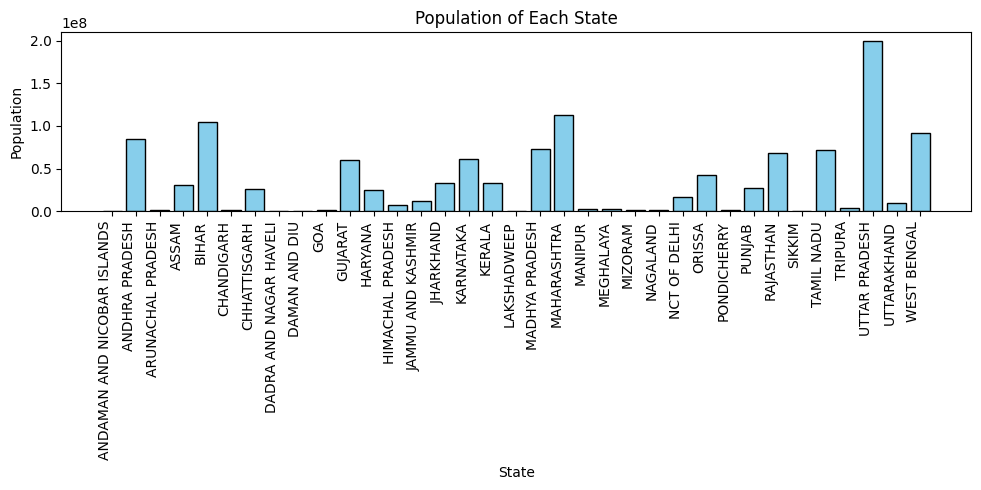

In [52]:
# Grouping records with same state
state_populations = df.groupby('state_name')['Population'].sum().reset_index()

# Create a bar graph
plt.figure(figsize=(10, 5))
plt.bar(state_populations['state_name'], state_populations['Population'], color='skyblue', edgecolor='black')
plt.title('Population of Each State')
plt.xlabel('State')
plt.ylabel('Population')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the bar graph
plt.show()

2. Which state has the most females?

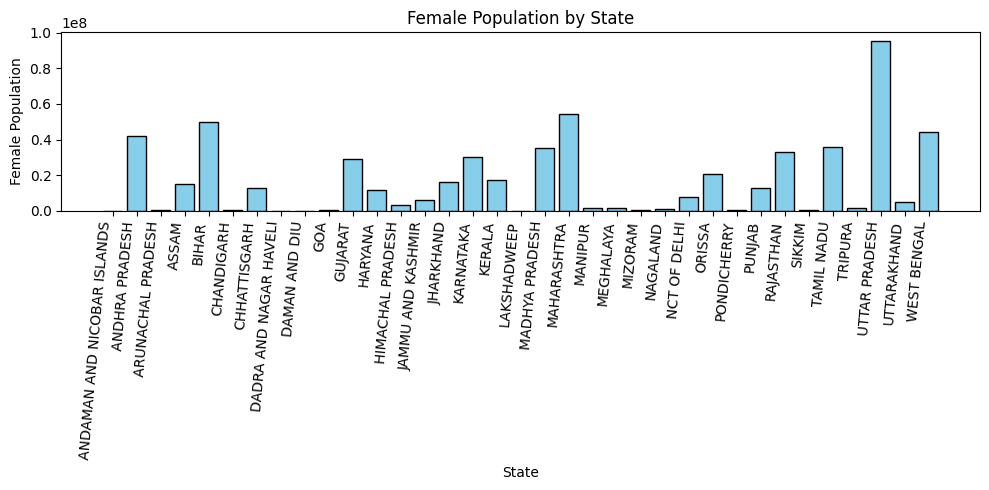

In [53]:
# Aggregate the female population by state
state_female_population = df.groupby('state_name')['Female'].sum().reset_index()

# Create a bar graph
plt.figure(figsize=(10, 5))
plt.bar(state_female_population['state_name'], state_female_population['Female'], color='skyblue', edgecolor='black')
plt.title('Female Population by State')
plt.xlabel('State')
plt.ylabel('Female Population')
plt.xticks(rotation=85, ha='right')
plt.tight_layout()

# Show the bar graph
plt.show()

3. Which state has the most males?



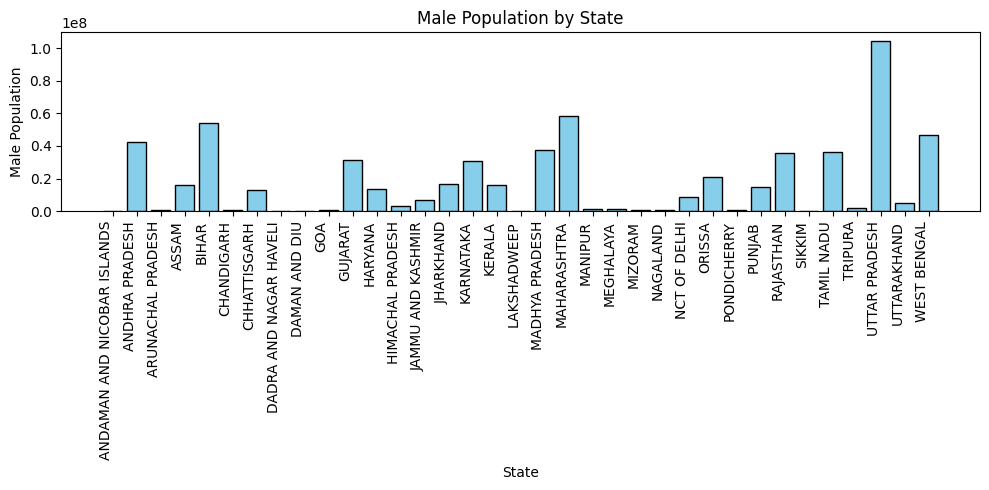

In [54]:
# Aggregate the male population by state
state_male_population = df.groupby('state_name')['Male'].sum().reset_index()

# Create a bar graph
plt.figure(figsize=(10, 5))
plt.bar(state_male_population['state_name'], state_male_population['Male'], color='skyblue', edgecolor='black')
plt.title('Male Population by State')
plt.xlabel('State')
plt.ylabel('Male Population')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Show the bar graph
plt.show()

4. State wise Sex Ratio.

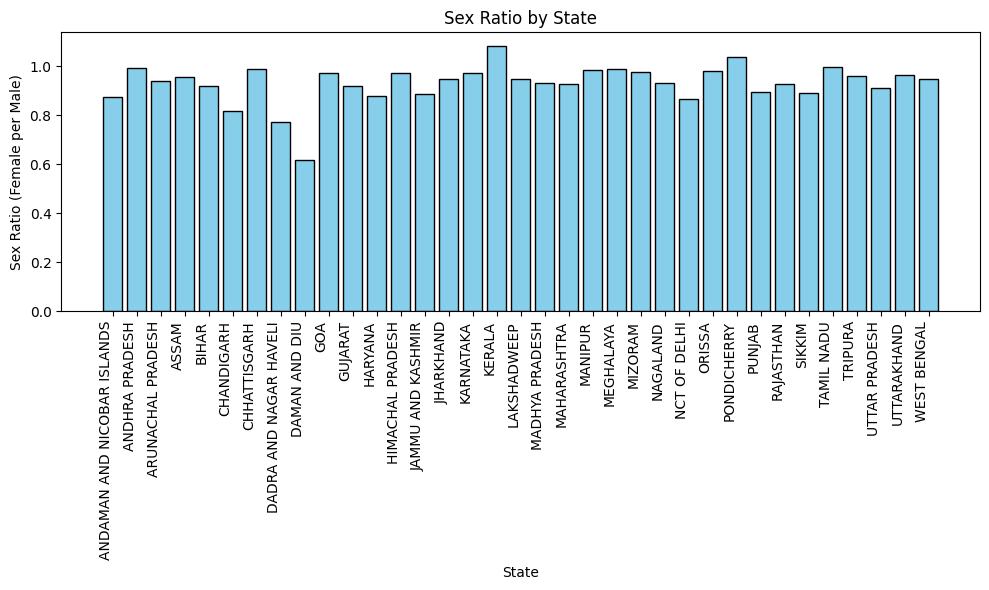

In [55]:
# Aggregate the total male and female populations by state
state_populations = df.groupby('state_name').agg({'Population': 'sum', 'Male': 'sum', 'Female': 'sum'}).reset_index()

# Calculate the sex ratio for each state
state_populations['Sex Ratio'] = state_populations['Female'] / state_populations['Male']

# Create a bar graph for sex ratio by state
plt.figure(figsize=(10, 6))
plt.bar(state_populations['state_name'], state_populations['Sex Ratio'], color='skyblue', edgecolor='black')
plt.title('Sex Ratio by State')
plt.xlabel('State')
plt.ylabel('Sex Ratio (Female per Male)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Show the bar graph
plt.show()

5. Which state has more districts?

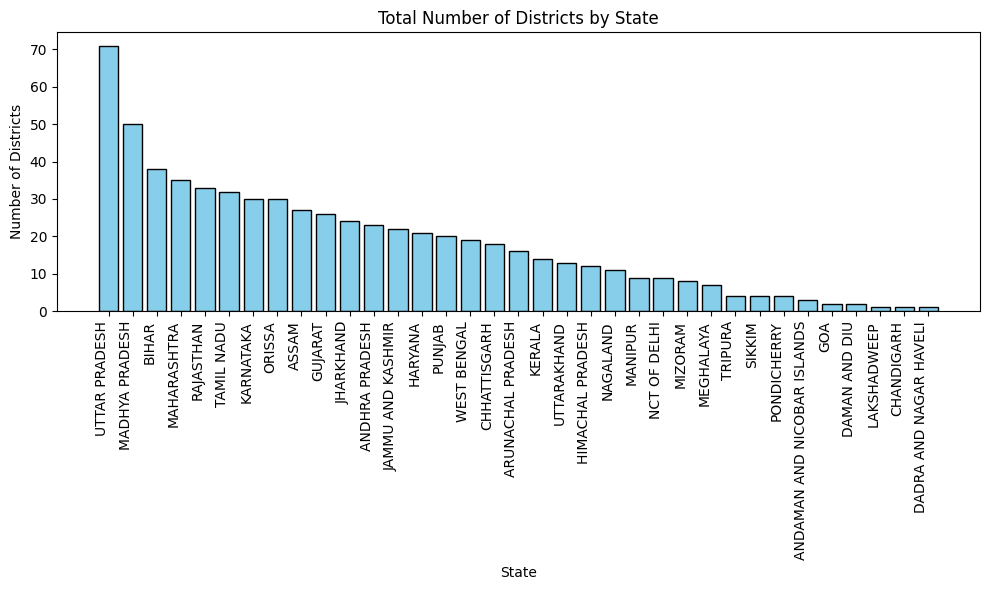

In [56]:
# Count the number of districts in each state
district_counts = df['state_name'].value_counts().reset_index()
district_counts.columns = ['state_name', 'Number of Districts']

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(district_counts['state_name'], district_counts['Number of Districts'], color='skyblue', edgecolor='black')
plt.title('Total Number of Districts by State')
plt.xlabel('State')
plt.ylabel('Number of Districts')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the bar graph
plt.show()

6. Literacy by state

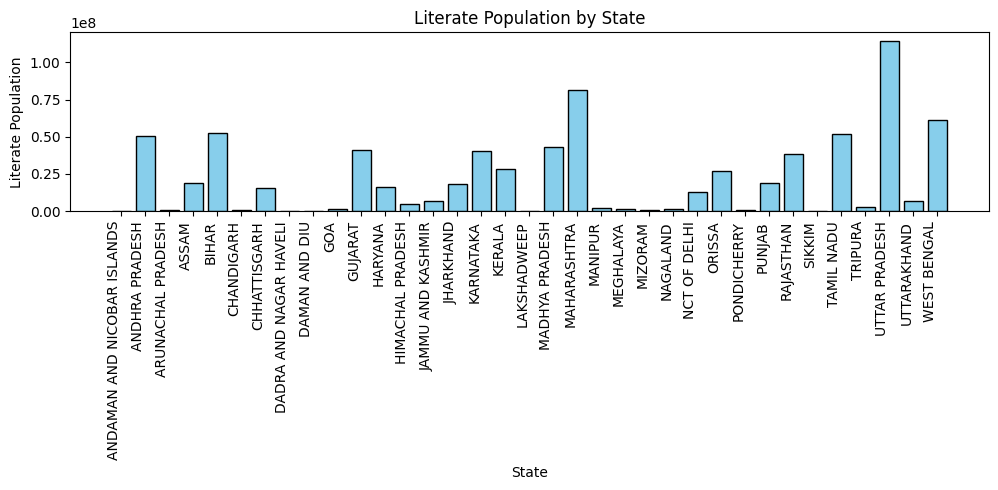

In [57]:
# Aggregate the literate population by state
state_literate_population = df.groupby('state_name')['Literate'].sum().reset_index()

# Create a bar graph
plt.figure(figsize=(10, 5))
plt.bar(state_literate_population['state_name'], state_literate_population['Literate'], color='skyblue', edgecolor='black')
plt.title('Literate Population by State')
plt.xlabel('State')
plt.ylabel('Literate Population')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Show the bar graph
plt.show()

7. Hindu Population state-wise

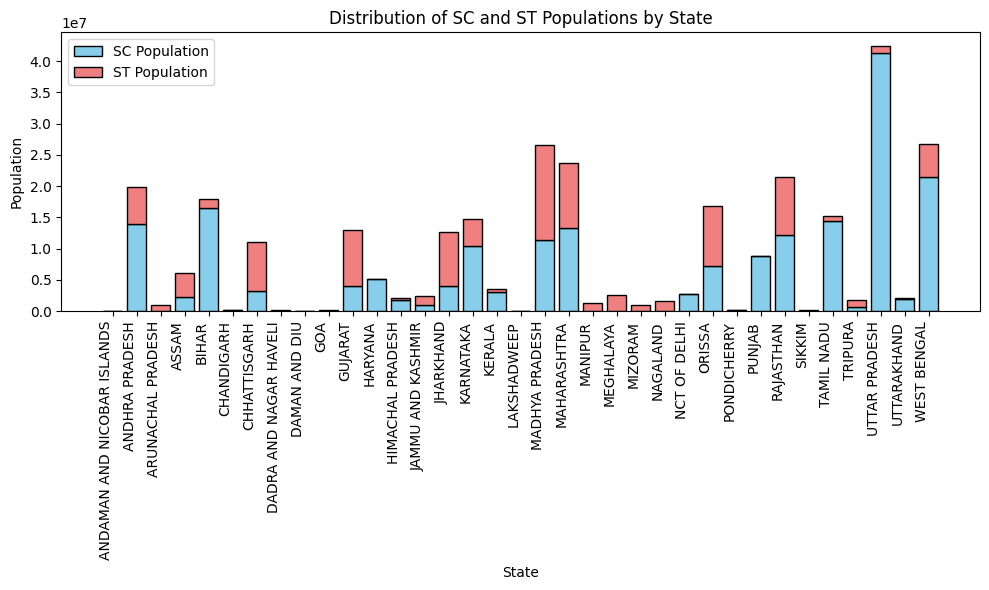

In [58]:
# Group the data by state and calculate total SC and ST populations
sc_st_distribution = df.groupby('state_name').agg({'SC': 'sum', 'ST': 'sum'}).reset_index()

# Create a bar graph to visualize the distribution
plt.figure(figsize=(10, 6))
plt.bar(sc_st_distribution['state_name'], sc_st_distribution['SC'], label='SC Population', color='skyblue', edgecolor='black')
plt.bar(sc_st_distribution['state_name'], sc_st_distribution['ST'], label='ST Population', bottom=sc_st_distribution['SC'], color='lightcoral', edgecolor='black')
plt.title('Distribution of SC and ST Populations by State')
plt.xlabel('State')
plt.ylabel('Population')
plt.legend()
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the bar graph
plt.show()

8. Explore the age distribution in different regions and identify trends related to age groups.

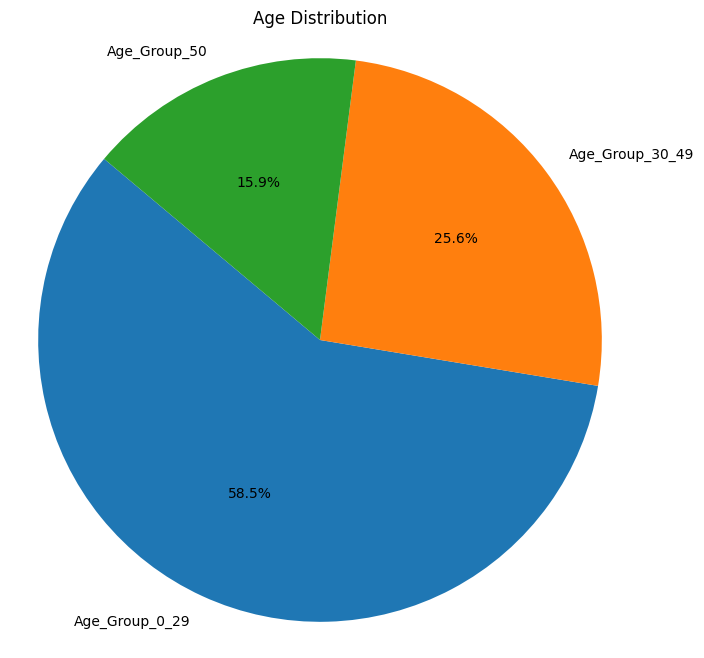

In [59]:
# Define age group labels
age_groups = ['Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50']

# Calculate the total population within each age group
age_distribution = df[age_groups].sum()

# Create a pie chart to visualize the age distribution
plt.figure(figsize=(8, 8))
plt.pie(age_distribution, labels=age_groups, autopct='%1.1f%%', startangle=140)
plt.title('Age Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Show the pie chart
plt.show()

9. Explore the age distribution in different regions and identify trends related to age groups.

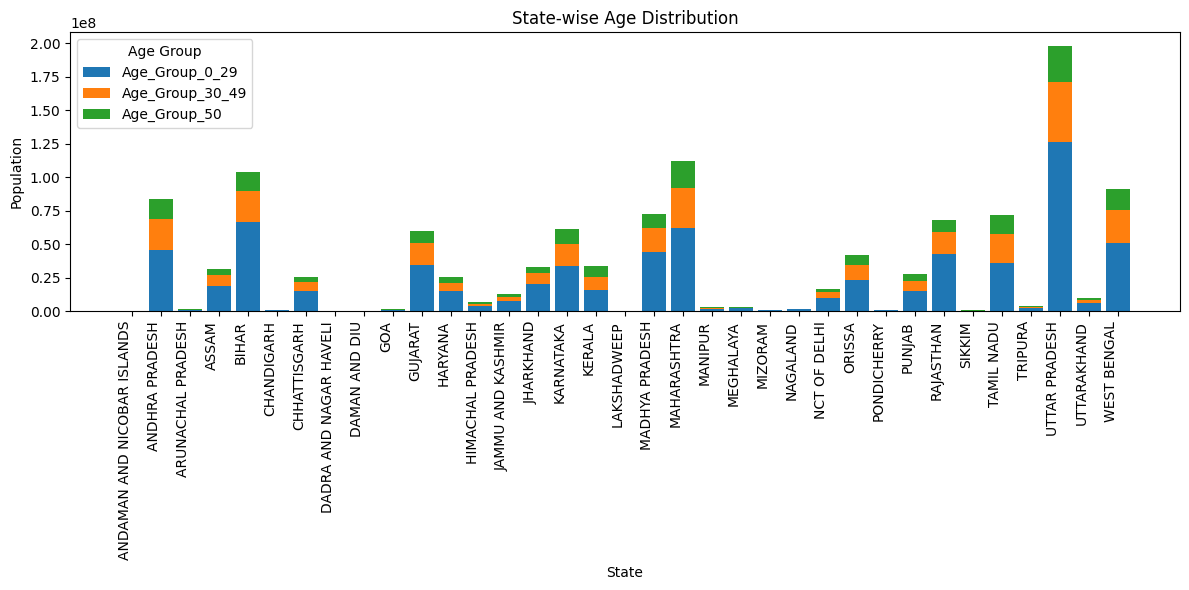

In [60]:
# Define age group labels
age_groups = ['Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50']

# Group the data by state
state_age_distribution = df.groupby('state_name')[['Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50']].sum().reset_index()

# Create a stacked bar chart to visualize state-wise age distribution
plt.figure(figsize=(12, 6))
x = state_age_distribution['state_name']
bottom = None

for age_group in age_groups:
    plt.bar(x, state_age_distribution[age_group], label=age_group, bottom=bottom)
    if bottom is None:
        bottom = state_age_distribution[age_group]
    else:
        bottom += state_age_distribution[age_group]

plt.title('State-wise Age Distribution')
plt.xlabel('State')
plt.ylabel('Population')
plt.legend(title='Age Group')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the stacked bar chart
plt.show()

Religious Distribution

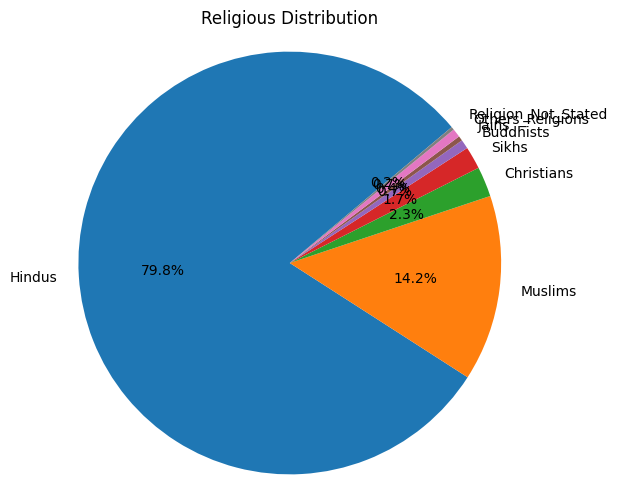

In [61]:
# Define religious group labels
religious_groups = ['Hindus','Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains','Others_Religions', 'Religion_Not_Stated']

# Calculate the total population of each religious group for the entire dataset
total_population_by_religion = df[religious_groups].sum()

# Create a pie chart to visualize religious distribution
plt.figure(figsize=(6, 6))
plt.pie(total_population_by_religion, labels=religious_groups, autopct='%1.1f%%', startangle=40)
plt.title('Religious Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Show the pie chart
plt.show()

## Sub-Assignment 3

In [72]:
df.to_csv('updated.csv', index=False)

In [67]:
df.columns

Index(['Population', 'Male', 'Female', 'Literate', 'Male_Literate',
       'Female_Literate', 'SC', 'Male_SC', 'Female_SC', 'ST', 'Male_ST',
       'Female_ST', 'Workers', 'Male_Workers', 'Female_Workers',
       'Main_Workers', 'Marginal_Workers', 'Non_Workers', 'Cultivator_Workers',
       'Agricultural_Workers', 'Household_Workers', 'Other_Workers', 'Hindus',
       'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains',
       'Others_Religions', 'Religion_Not_Stated', 'LPG_or_PNG_Households',
       'Housholds_with_Electric_Lighting', 'Households_with_Internet',
       'Households_with_Computer', 'Rural_Households', 'Urban_Households',
       'Households', 'Below_Primary_Education', 'Primary_Education',
       'Middle_Education', 'Secondary_Education', 'Higher_Education',
       'Graduate_Education', 'Other_Education', 'Literate_Education',
       'Illiterate_Education', 'Total_Education', 'Age_Group_0_29',
       'Age_Group_30_49', 'Age_Group_50', 'district_code', 'state_name',
 